In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(247, 14)

In [5]:
# BAsic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data Cleaning and Preprocessing

In [6]:
# Check for duplicate entries
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [7]:
#CHecking for missing values
print(df.isnull().sum())

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64


In [8]:
# view column names
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [9]:
#Standardize column names
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes'],
      dtype='object')

In [10]:
# Create the region column based on the dataset description
df.loc[:125, 'region'] = 0 #Bejaia
df.loc[125:, 'region'] = 1 #Sidi bel abbes
df['region'] = df['region'].astype(int)

In [11]:
# check the second header location
df.iloc[[124]]

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0


In [12]:
#Drop the second header row
df = df.drop(124, axis=0).reset_index(drop=True)

In [13]:
#SInce null values are pretty small
df.dropna(inplace=True)

In [14]:
#Handle inconsistent data types (Ints)
cols = ['day', 'month', 'year', 'temperature', 'rh', 'ws']
df[cols] = df[cols].astype(int)

In [15]:
float_cols = ['rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi']
df[float_cols] = df[float_cols].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


## Exploratory Data Analysis

In [17]:
#Basic statistics of the dataset (Numeric columns)
num_col = df.select_dtypes(include=[np.number])
num_stats = num_col.describe().T
num_stats['Median'] = num_col.median()
num_stats

,count,mean,std,min,25%,50%,75%,max,Median
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0,16.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0,8.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0,2012.0
temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0,32.0
rh,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0,63.0
ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0,15.0
rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8,0.0
ffmc,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0,83.3
dmc,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9,11.3
dc,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4,33.1


In [18]:
#Basic statistics of the dataset (Categorical columns)
cat_col = df.select_dtypes(include=[object])
cat_stats = cat_col.describe().T
cat_stats

,count,unique,top,freq
classes,243,8,fire,131


In [19]:
#Handle class column (Standardize unique values)
print(df['classes'].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [20]:
# Stabdardize the class names
df['classes'] = df['classes'].str.lower().str.strip()
df['classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
#Save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned.csv', index=False)

In [42]:
# Create a copy of the dataframe with main columns
df_main = df.drop(['day', 'month', 'year'], axis=1)
df_main.head(2)

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


### Univariate Analysis

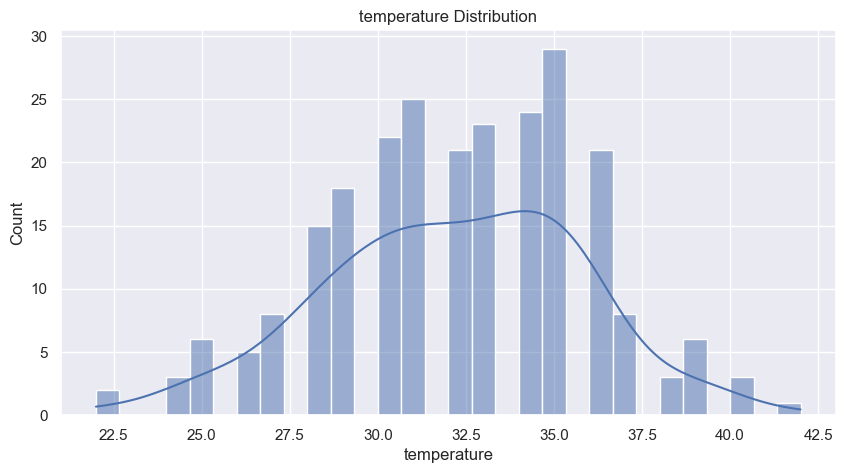

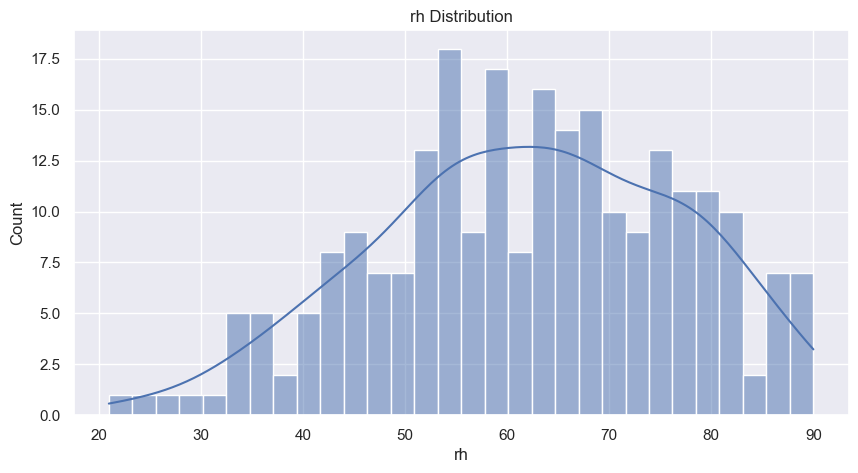

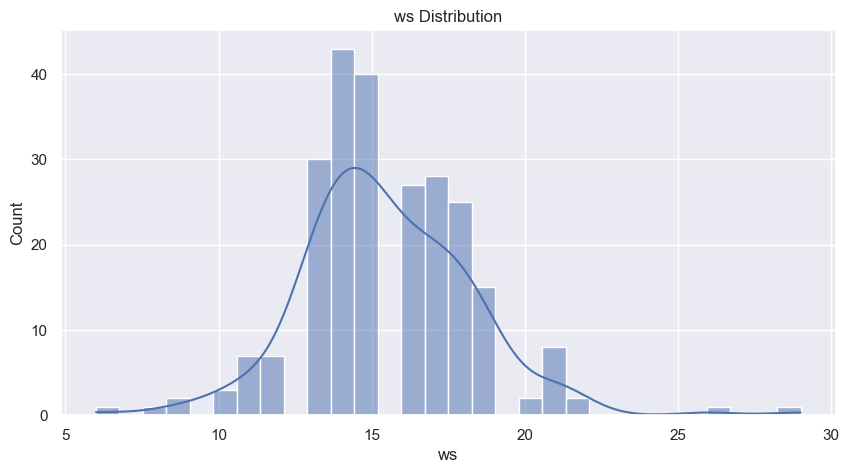

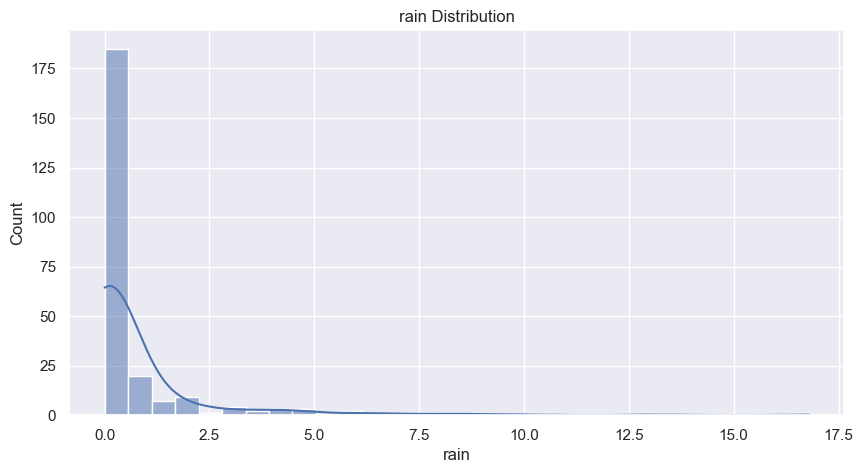

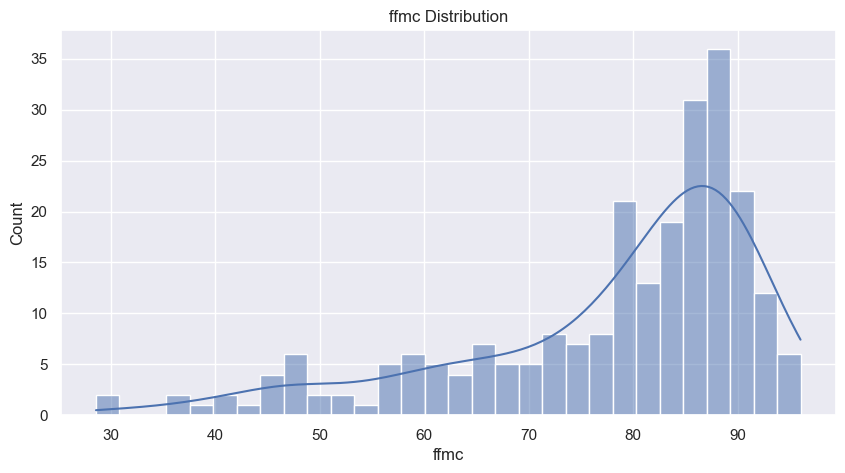

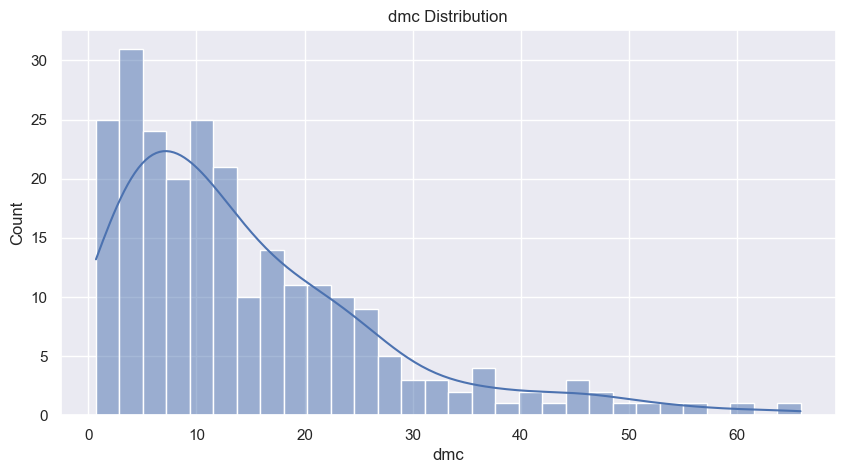

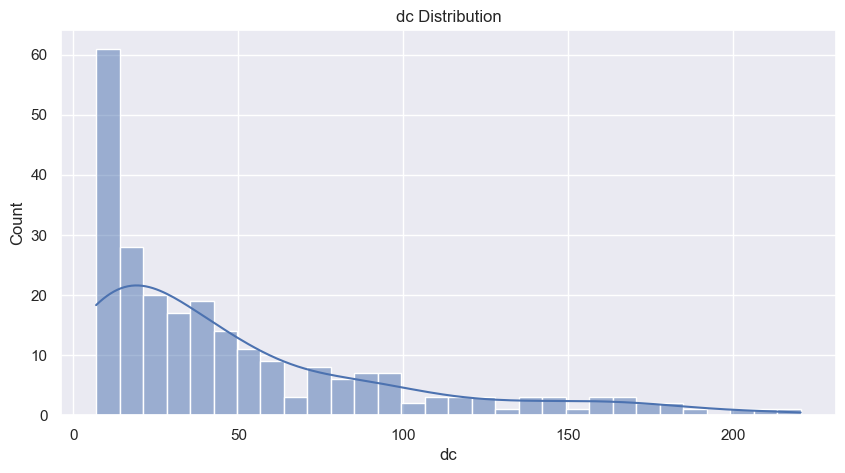

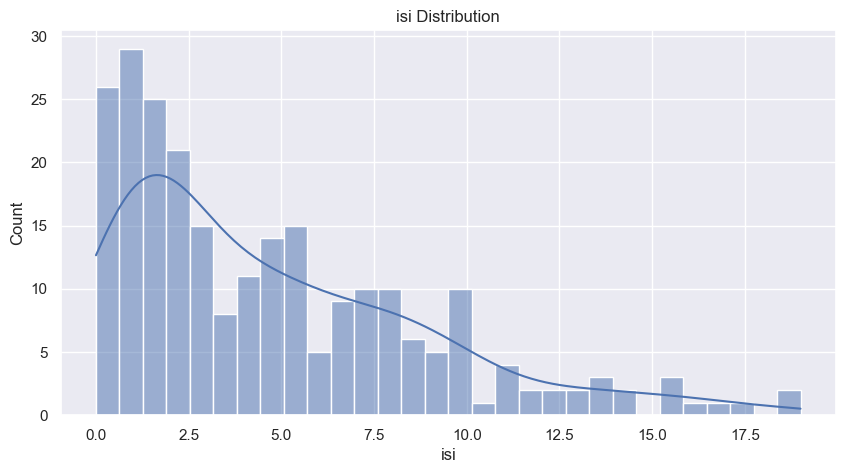

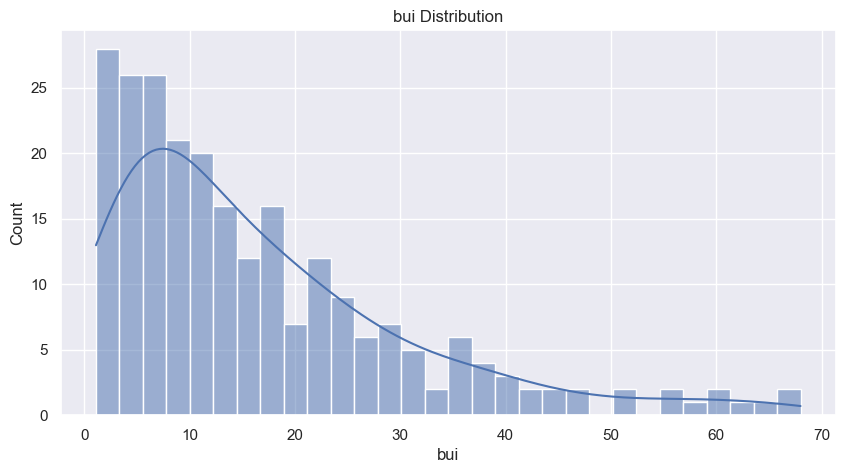

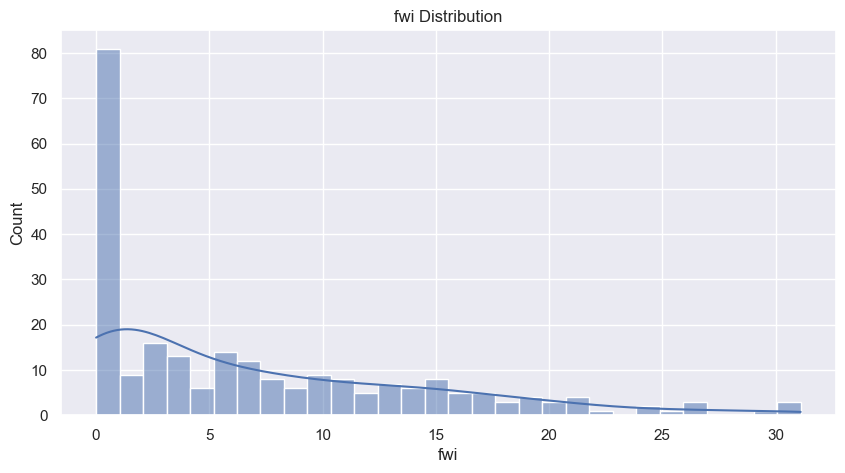

In [23]:
# Numerical columns
num_cols = df_main.select_dtypes(include=[np.number])

for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.title(f'{col} Distribution')
    sns.histplot(df[col], kde=True, bins=30)
    plt.show()

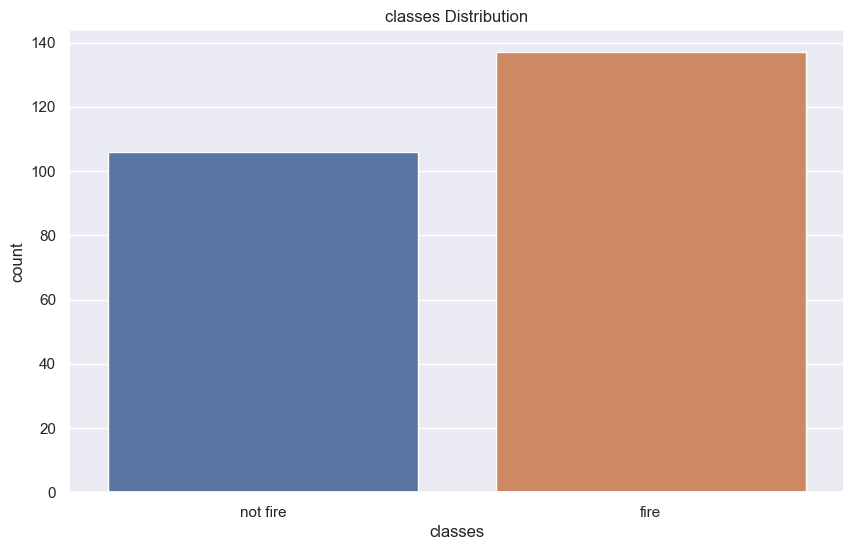

In [24]:
# Categorical columns

cat_cols =  df_main.select_dtypes(include=['object'])

for col in cat_cols:
    plt.figure(figsize=(10,6))
    plt.title(f'{col} Distribution')
    sns.countplot(df,x=col,hue='classes')
    plt.show()

### Bivariate Analysis

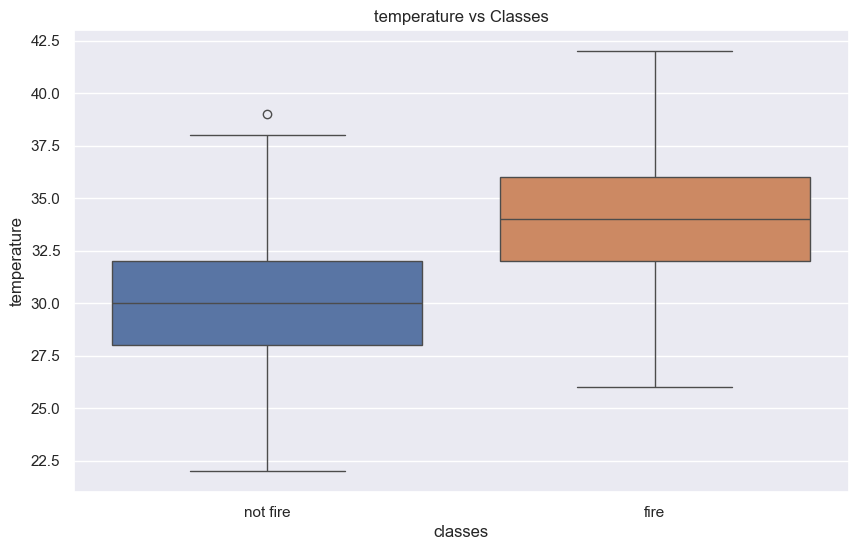

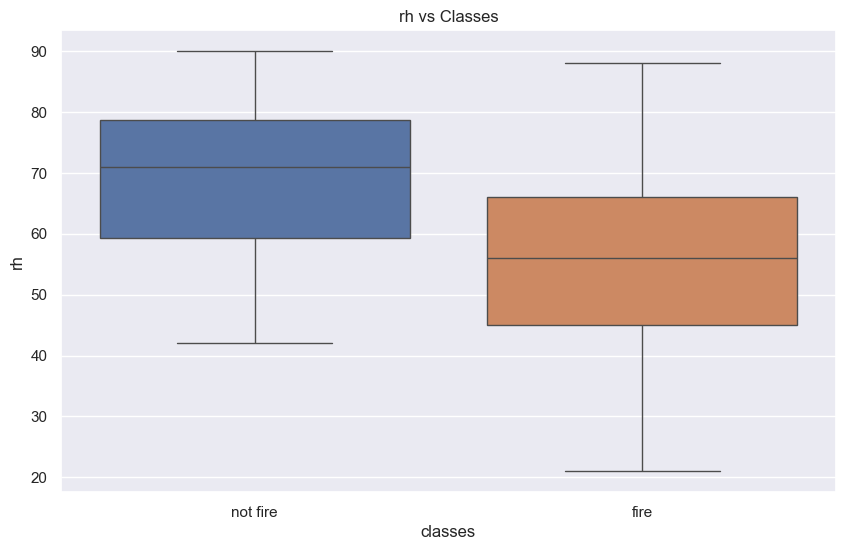

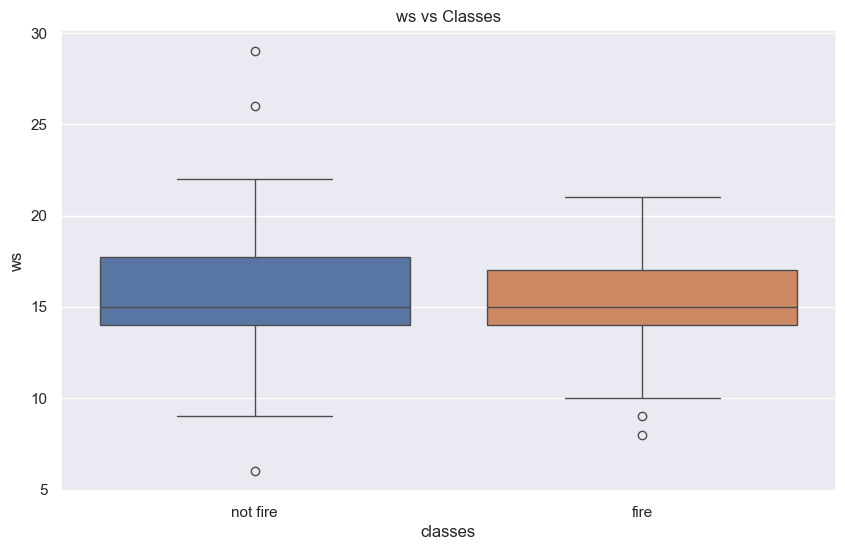

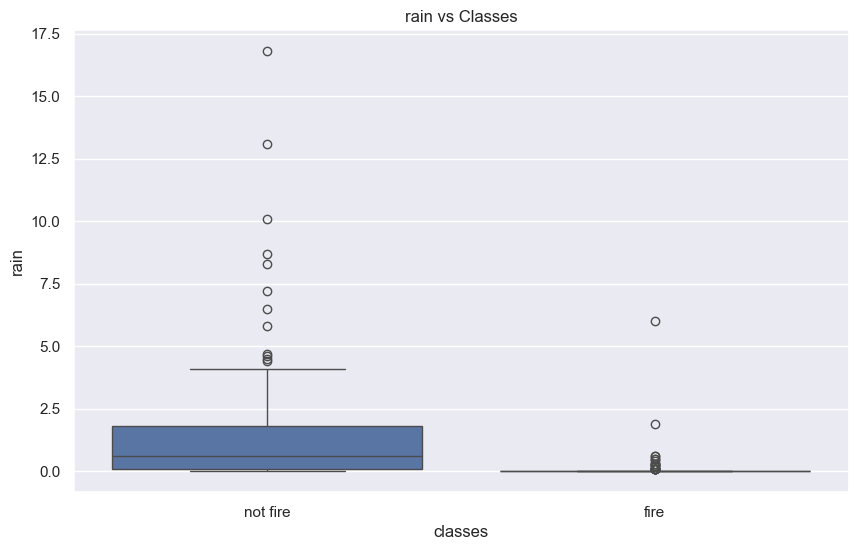

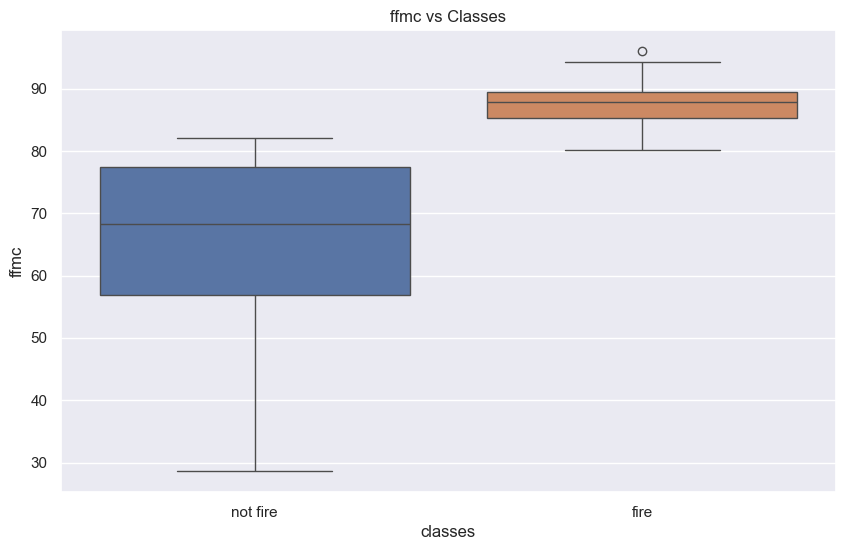

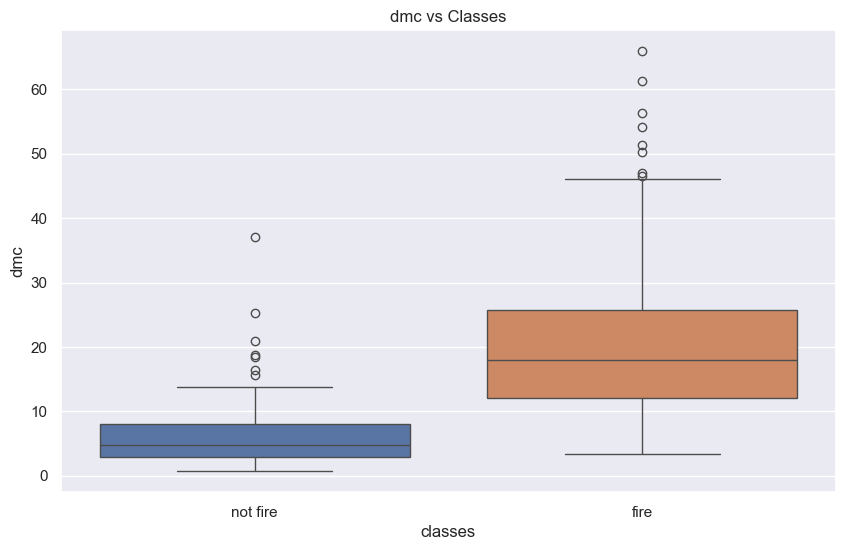

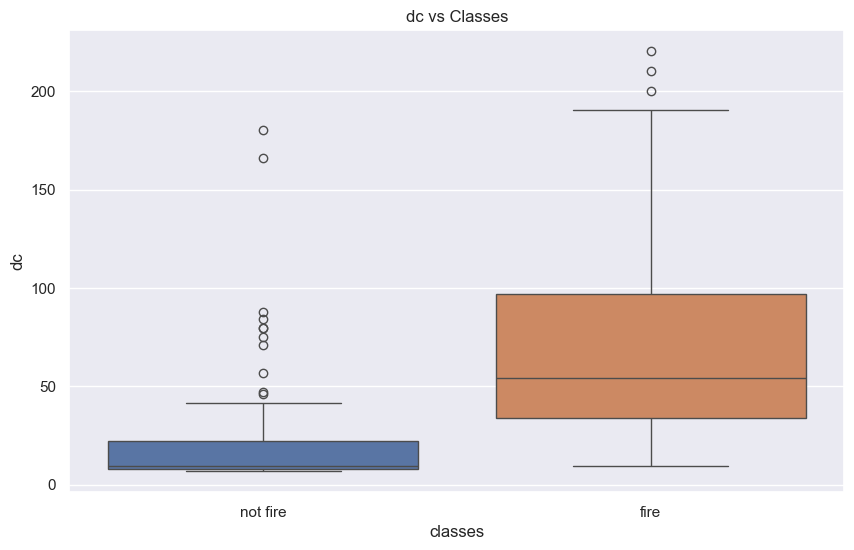

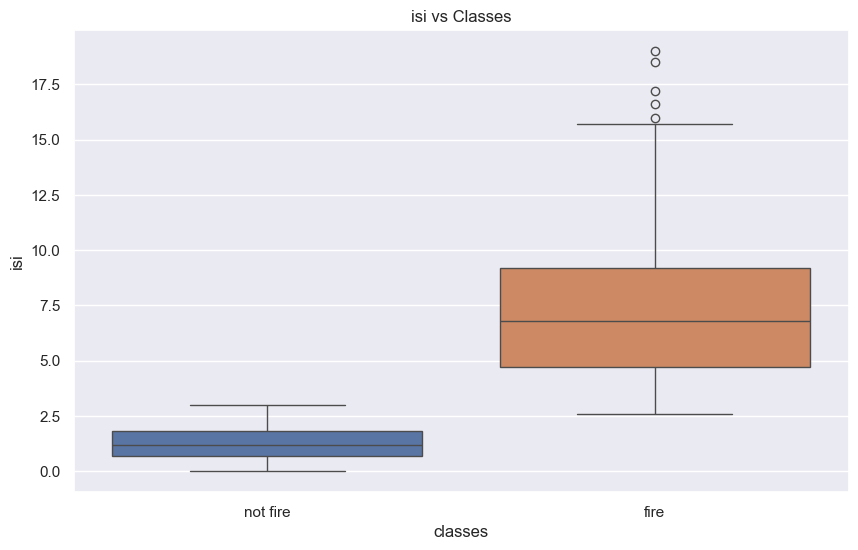

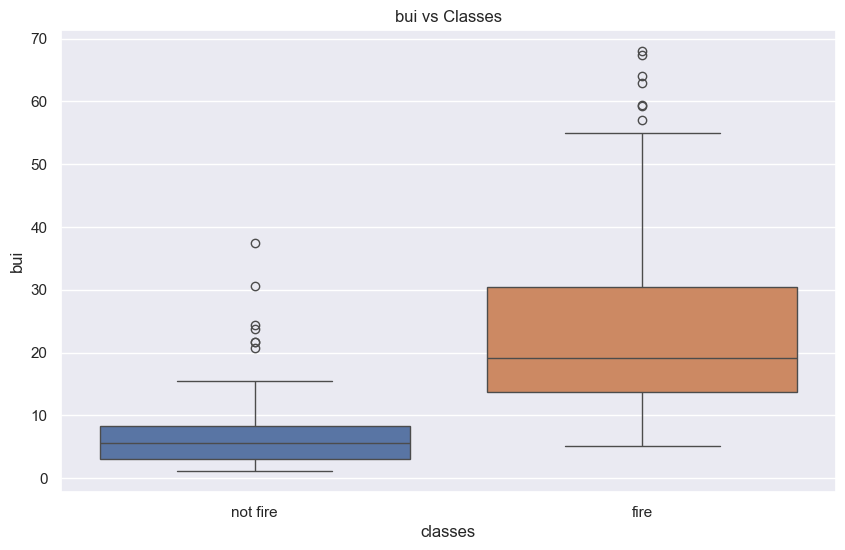

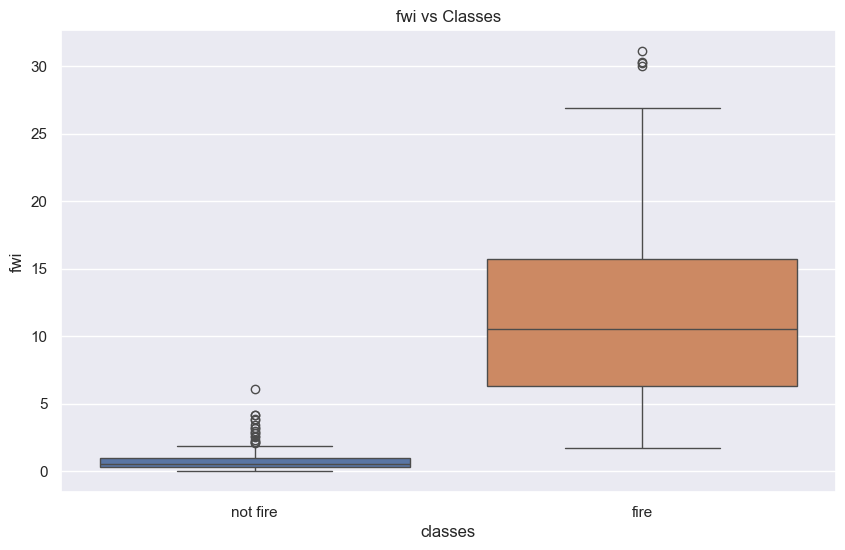

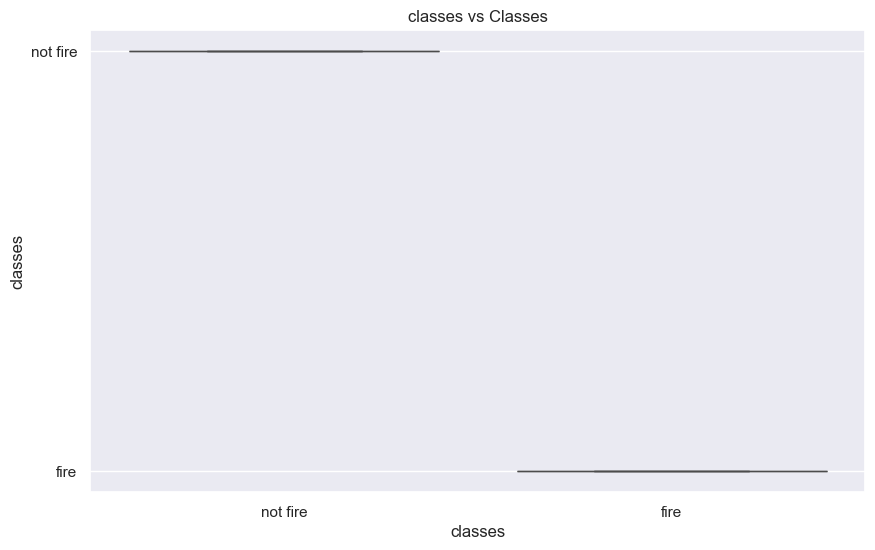

In [25]:
# Analyze with respect to the target variable
for col in df_main:
    plt.figure(figsize=(10,6))
    plt.title(f'{col} vs Classes')
    sns.boxplot(df,x=df['classes'], y=df[col], hue='classes')
    plt.show()

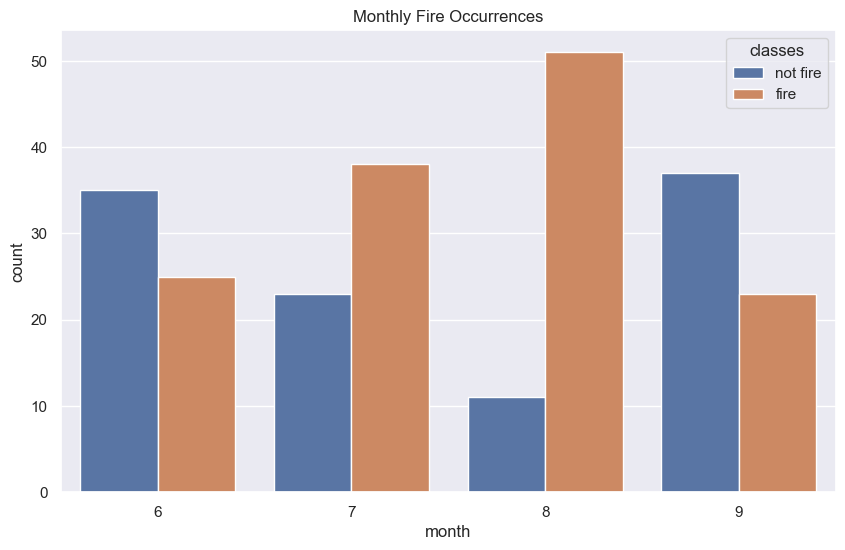

In [ ]:
# Monthly fire occurrences
plt.figure(figsize=(10, 6))
plt.title('Monthly Fire Occurrences')
sns.countplot(data=df, x='month', hue='classes')
plt.show()

### Multivariate Analysis+

In [26]:
df_main['classes'] = df_main['classes'].replace({'not fire' : 0, 'fire' : 1})
print(df_main['classes'].unique())

[0 1]


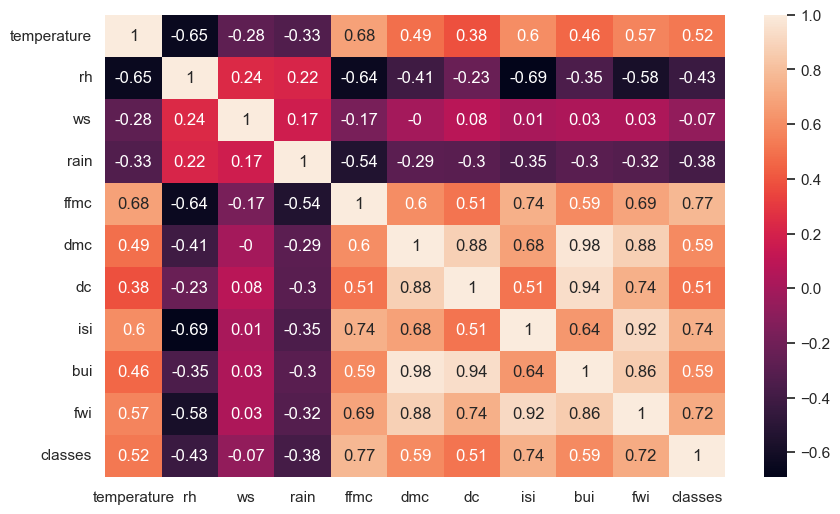

In [27]:
# correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_main.corr().round(2),annot=True)
plt.show()

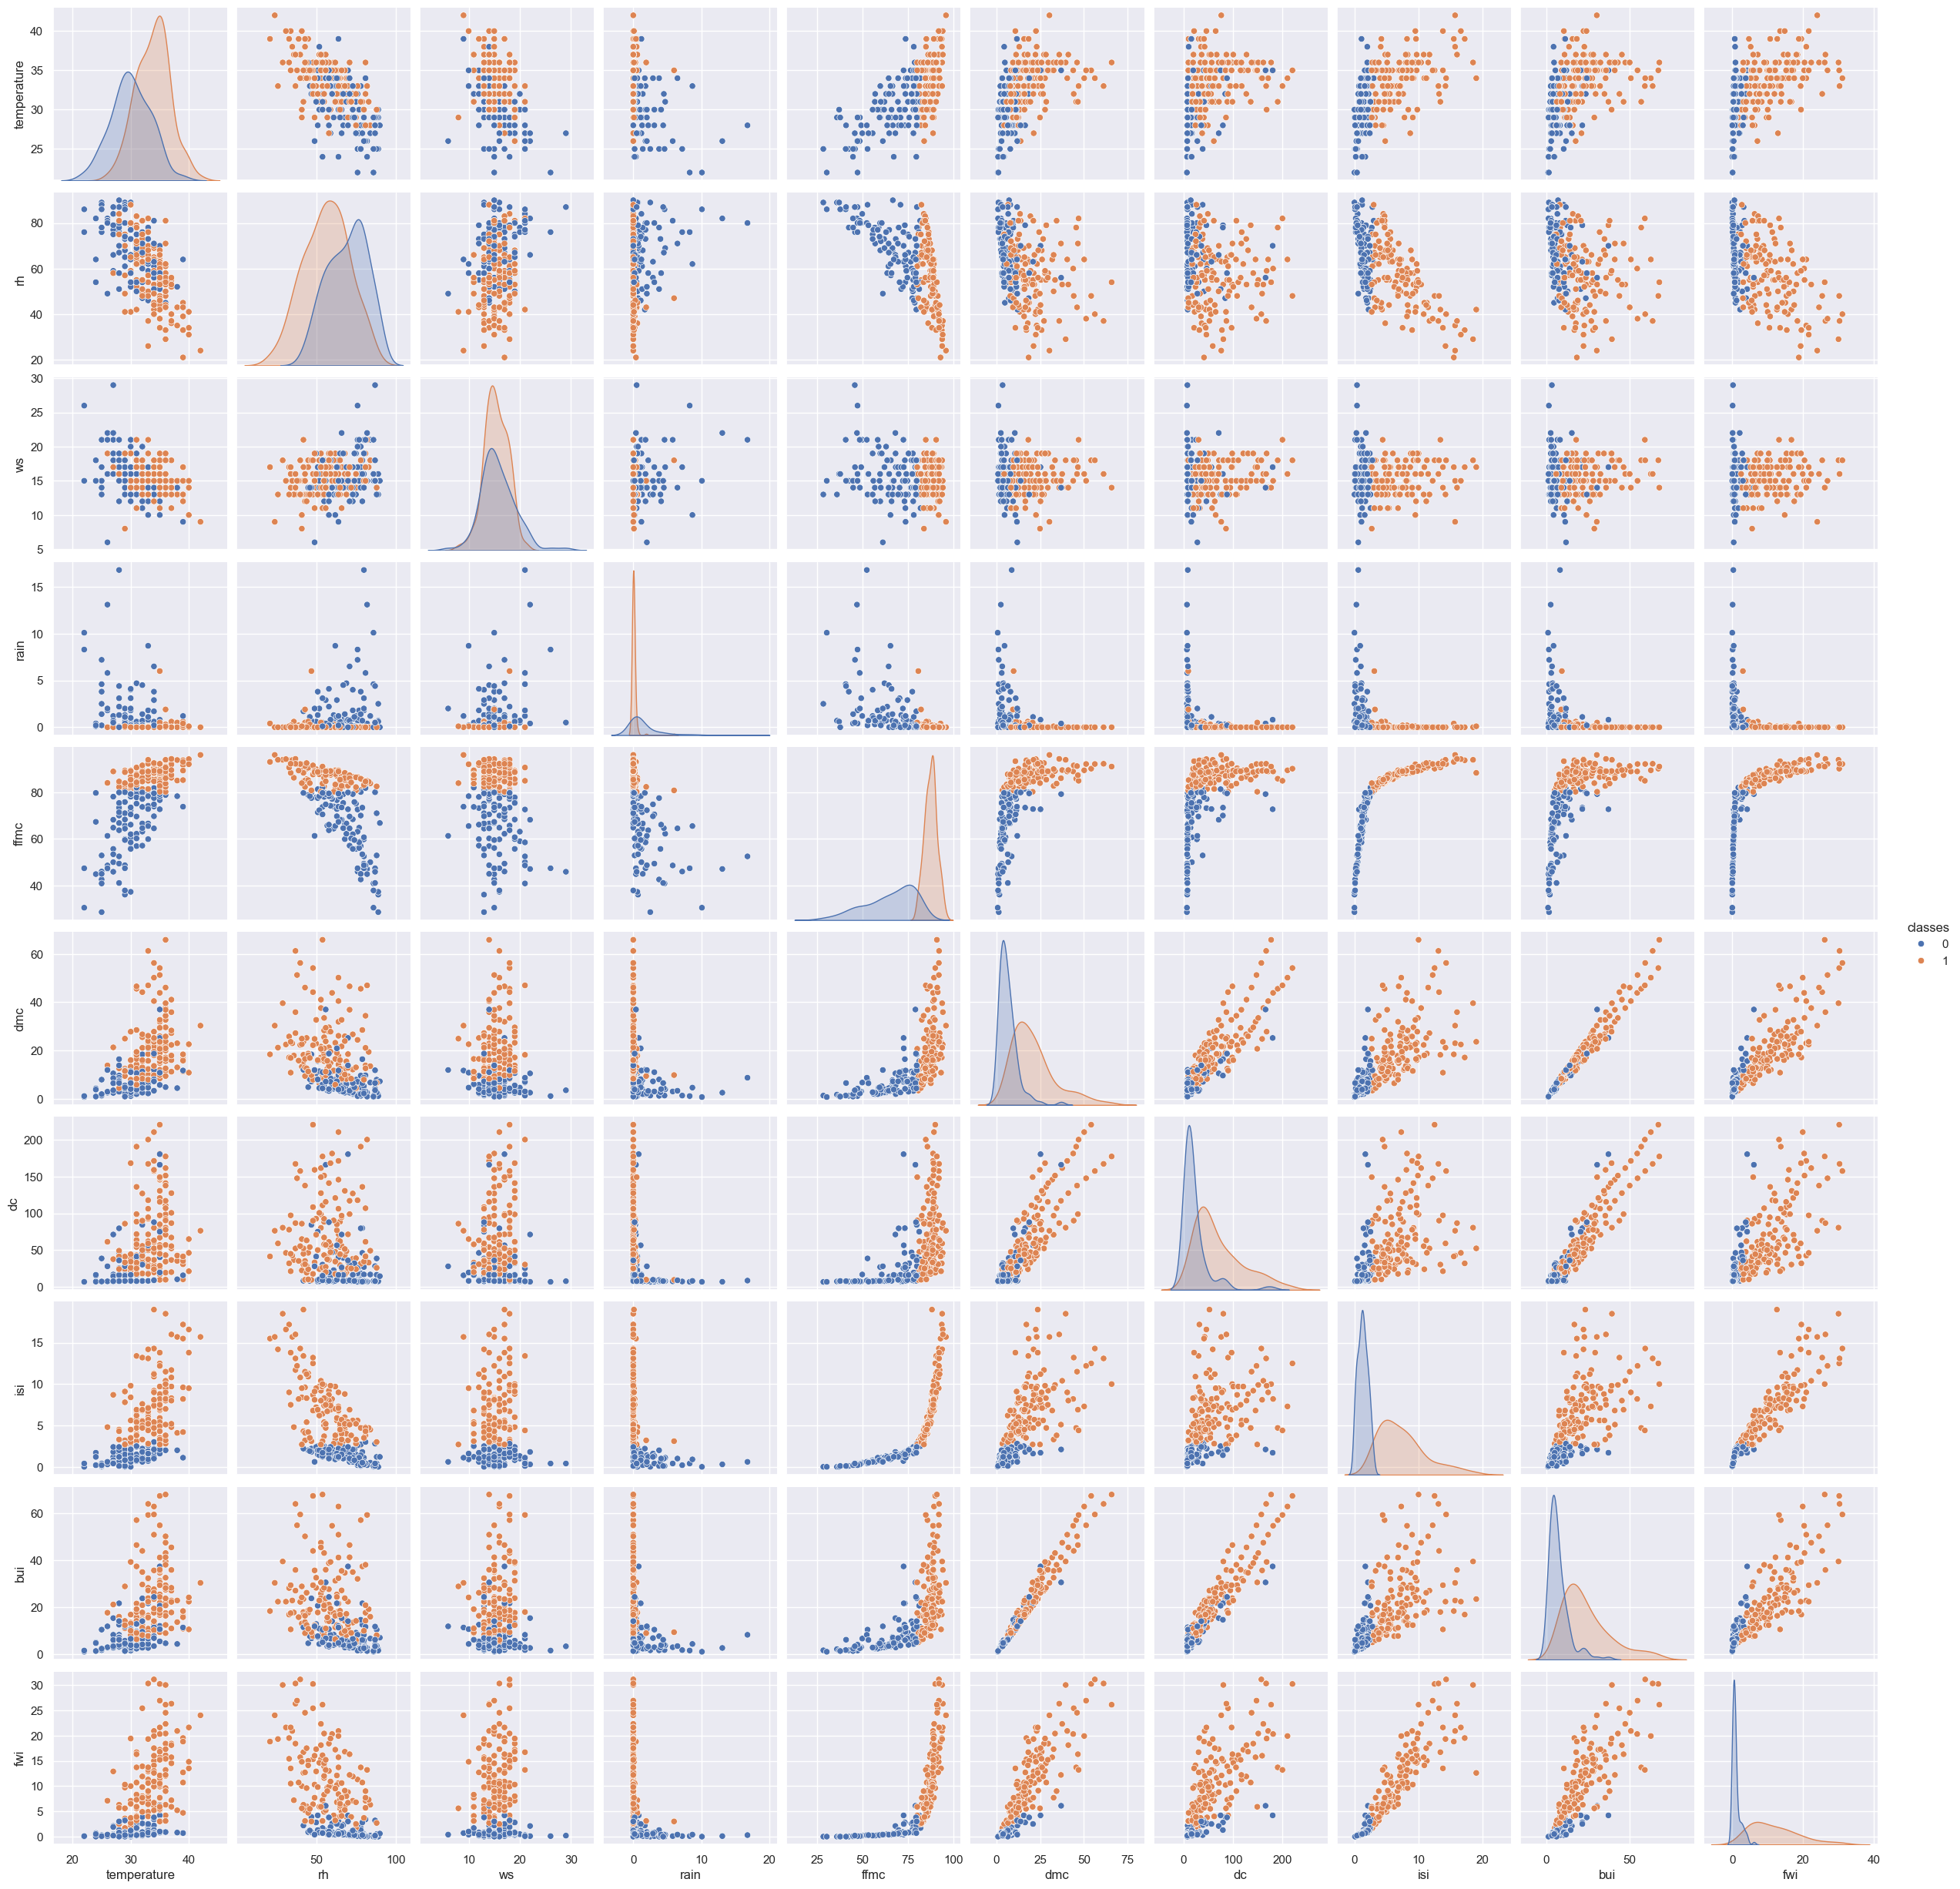

In [28]:
# Pairplot
sns.pairplot(df_main,hue='classes')
plt.show()